<span style="font-size:x-large;">Lab 4: Mini-Assignment</span>

# Census Lab Assignment

### Declaration

This declaration should be completed and remain attached to the bottom of your submission.

*I am aware of the University’s [policy on academic conduct](https://www.governance.uwa.edu.au/procedures/policies/policies-and-procedures?method=document&id=UP07/21) and I declare that this assignment is my own work entirely and that suitable acknowledgement has been made for any sources of information used in preparing it. I have retained a hard copy for my own records.*

Name: Jacob Posel

Date: 8/9/2020

---

## Task

Investigate a question of your choosing about a population from the 2016 Census data provided by the Australian Bureau of Statistics (ABS), and present your findings, as discussed in the accompanying assignment sheet.

---

<span style="font-size:x-large;">Question: Do women do more unpaid domestic work than men, and is there a generational change in traditional gender roles?</span>

# Context

Gender equality in Australia has made great strides over the last century. Traditional gender roles have advanced from men being sole breadwinners and women engaging primarily in domestic tasks, to a more equal structure with men and women both financially providing for the family and sharing domestic duties. However, I will test the extent to which these domestic duties are shared between the gender, and if the tradional family values still linger in modern Australian families. 

I will specifically be looking into the number of hours of domestic duties done by each gender at each age, to see if there has been any generational change regarding domestic work by each gender. I will then look at the total domestic work done by each gender. 

My hypothesis is that women still engage in more domestic work than men, however, younger women will do relatively less domestic work than older women due to the advancing values of gender equality in society. 

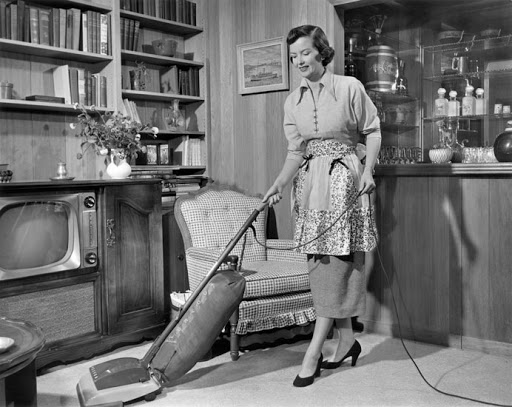

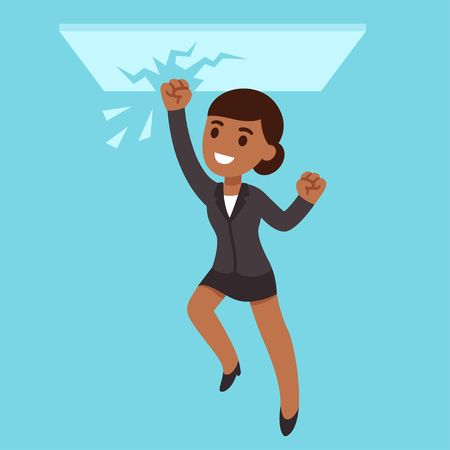

# DATA AQUISITION

I have aquired my data from the Australian Bureau of Statistics 2016 Census Datapacks. 

link: https://datapacks.censusdata.abs.gov.au/datapacks/

I have downloaded the General Community Profile datapack, and then selected the table "Unpaid Domestic Work:  Number of House by Age by Sex", table number G20.

I have only used the file G20A. G20B contains irrelevant information to me as I am looking at unpaid work by gender, where G20B only contains information by "Person"

# OPENING FILE AND CLEANING DATA

The following functions serve to open my file and fix the data into a more consistent format. I will be dealing with two types of data, which I have logically broken into two groups, total and age. Total data refers to the total number of hours of domestic work done by each gender, regardless of age. Age data is more detailed and looked at domestic work done by each gender, at each age range. 

## Age Data
Age data headings were given in the format 'Gender_lowage_highage_DUDW_lowhour_highhour_hour', for example 'M_25_34y_DUDW_15_29_h' which can be read as "Men ages 25-34 did unpaid domestic work between 15-29 hours". I have used the fix_data(data_lists) function to change the headings into a more consistent format which is 'Gender_lowage_highage_lowhour_highhour', for example M_25_34y_15_29. I then used the split_ages(age_gender_list) function to convert the large list of ages returned by the fix_data function into a nested lists of lists with each age range being its own list. 

### Assumptions:
I also made the following assumptions. Firstly, the greatest range of hours was 30+. I changed this to 30-40 hours. Secondly, the greatest age range was 85+, previous increments were by 9 years so i changed this to 85-94. Additionally, I combined two of the categories, which were "did less than 5 hours of domestic work" and "did no domestic work", as no domestic work is logically the same as 0 hours of domestic work.

## Total Data

Total data was given in the formal "Gender_Total_DUDW_lowhour_highhour_h, for example F_Tot_DUDW_15_29_h', which can be read as "Females total did unpaid domestic work 15 to 29 hours". In the fix_data(data_lists) function I changed this to a more consistent format, "Gender_lowhour_highour", for example 'F_15_29' which is cleaner and easier to use. 

### Assumptions
Similarly as the age data,  I combined the ranges "did less than 5 hours " and "did no domestic work".

In [1]:
#This function opens and file and headings and numbers into a list
def open_file(filename):

    #open file and make lines into list
    with open(filename,'r') as file:
        contents = file.read()
    lines = contents.splitlines()
    headings = lines[0].split(',')[1:]
    numbers = lines[1].split(',')[1:]
    data_lists = (headings,numbers)
    return(data_lists)




In [2]:
data_lists = open_file('2016Census_G20A_AUS.csv')

In [3]:
def fix_data(data_lists):
    
    headings = data_lists[0]
    numbers = data_lists[1]
    headings_totals = []
    age_headings = []
    age_numbers = []
    final_age_headings = []

    final_headings_totals = []
    final_numbers_totals = []
    
    #select appropriate data and appending to lists 
    for i in range(len(headings)):
        
        if "_Tot_" in headings[i] and len(headings[i])>12:
            headings_totals.append(headings[i])
            final_numbers_totals.append(int(numbers[i]))
        elif headings[i] == 'M_Tot_DNUDW' or headings[i] == 'F_Tot_DNUDW':
            headings_totals.append(headings[i])
            final_numbers_totals.append(int(numbers[i]))
        elif "_Tot_" not in headings[i] and "Total" not in headings[i] and 'NS' not in headings[i] and headings[i][0] != 'P':
            age_headings.append(headings[i])
            age_numbers.append(int(numbers[i]))
 
     #cleaning format of age headings 
    for i in age_headings:
        index1 = i.find('D')
        index2 = i.find('W')
        
        i = i[:index1] + i[index2+2:len(i)-2]
        if 'LT' in i:
            i = i.replace('LT', '0')
        if i[len(i)-1] == '_':
            i = i[:len(i)-2]
        if len(i) == 7:
            i = i + '_0'
        if len(i) == 12 and i[len(i)-1] == '_':
            i = i + '40'
        if 'ov' in i:
            i = i.replace('y', '')
            i = i.replace('ov', '94y')
        if 'o' in i:
            i = i.replace('o', '94y')
    
    
    
 
        final_age_headings.append(i)
        
    #combining did no unpaid domestic work and did less than 5 hours    
    for i in range(len(final_age_headings)-16):
        if len(final_age_headings[i]) < 10 and final_age_headings[i][len(final_age_headings[i])-1] == '0':
            age_numbers[i-4] += age_numbers[i]
            age_numbers.pop(i)
            final_age_headings.pop(i)
    final_age_headings.pop(int((len(final_age_headings)/2)-1))
    final_age_headings.pop()
    age_numbers.pop(int((len(age_numbers)/2)-1))
    age_numbers.pop()


    

    #cleaning format of total headings
    for i in headings_totals:
        if len(i)>11:
            index1 = i.find('h')
            i = i[:index1-1]
            index2 = i.find('_')
            index3 = i.find('_',9)
            i = i[:index2] + i[index3:]
            if 'LT' in i:
                i = i.replace('LT','0')
        else:
            i = i[0] + "_0"
            
 
        
            
    #combining "Did no unpaid domestic work" and "Did less than 5 hours of domestic work" and ordering lists for totals
        
        final_headings_totals.append(i)
    final_numbers_totals[0] += final_numbers_totals[4]
    final_headings_totals.pop(4)
    final_numbers_totals.pop(4)
    final_numbers_totals[4]+=final_numbers_totals[-1]
    final_headings_totals.pop()
    final_numbers_totals.pop()
    
     

    return(final_headings_totals, final_numbers_totals,final_age_headings, age_numbers)


In [4]:
#creating a tuple of the number of people and their headings 
final_totals = list(zip(fix_data(data_lists)[0], fix_data(data_lists)[1]))
final_ages = list(zip(fix_data(data_lists)[2], fix_data(data_lists)[3]))

In [5]:
#breaking data into men and women
final_ages_men = final_ages[:int(len(final_ages)/2)]
final_ages_women = final_ages[int(len(final_ages)/2):]

In [6]:
#breaking data into men and women
final_totals_men = final_totals[:int(len(final_totals)/2)]
final_totals_women = final_totals[int(len(final_totals)/2):]

In [7]:
#split the list of ages into nested lists by each age range 
def split_ages(age_gender_list):

    newlist = []
    a = 0
    for i in range(1,len(age_gender_list)):
        
        if i == len(age_gender_list)-1:
            split = age_gender_list[a:i]
            newlist.append(split)
            split = []
            a = i
            
        elif age_gender_list[i][0][1:8] == age_gender_list[i-1][0][1:8]:
            continue
    
        else:
            split = age_gender_list[a:i]
            newlist.append(split)
            split = []
            a = i

    return(newlist)

In [8]:
split_ages_men = split_ages(final_ages_men)
split_ages_women = split_ages(final_ages_women)

# CENTRAL MEASURES

The next two functions serve to calculate the central measures, being mean, median and mode of both the age and total data. 

## Assumptions

The number of hours done by each age and gender are given as categorical data, being a range. I made the assumption that for the sake of analysis, I could use the middle of the hour range as continuous data. For example, for the hour range 0-5hrs, I used 2.5 hours in my calculations to calculated a weighted mean. 

## Age Data

In order to store the age data central measures, I created a nested dictionary using the function get_central_dict(split_list). I used this dictionary to store the central measures of each age range, with the age range being the key of the larger dictionary and mean, median and mode being keys within that dictionary. This made it easy for me to access each central measure for each age range. To calculate the mean, I operated under the assumption illustrated above. I then found which age range the mean fell within, and used that range as the mean.

## Total Data

I did not calculate the central measures for the total data as I am analysing it using the total number of people rather than a central measure.


In [9]:
#calculate (mean,median,mode) of the totals and of each age
def central_measures (clean_data):
    
    
    #calculating mean
    numerator = 0
    denominator = 0
    for i in clean_data:
        if len(i[0]) < 8 and len(i[0]) > 4:
            n1 = i[0].find("_")
            n2 = i[0].find("_", n1+1)
            avg = (int(i[0][n2+1:]) - int(i[0][n1+1:n2]))/2 + int(i[0][n1+1:n2])
        elif len(i[0]) < 8 and len(i[0]) <= 4:
            n1 = i[0].find("_")
            avg = int(i[0][n1+1:])
        else:
            n1 = i[0].find("y_")
            rnge = i[0][n1+2:]
            n2 = rnge.find("_")
            avg = (int(rnge[n2+1:]) - int(rnge[:n2]))/2 + int(rnge[:n2])
        #else:
        numerator += i[1]*avg
        denominator += i[1]
    mean = round(numerator/denominator)
    for i in clean_data:
        n = i[0].find("_", -6)
        rnge = i[0][n+1:]
        index = rnge.find("_")
        low = int(rnge[:index])
        high = int(rnge[index+1:])
        if mean in range(low, high+1):
            new_mean = rnge
            break
        
        
    big_central_list = []
    
    #calculating median
    total = 0
    new_data = []
    for i in clean_data:
        total += i[1]
        i = i + (total,)
        new_data.append(i)

    if new_data[-1][-1] % 2 == 0:
        middle = new_data[-1][-1]/2
    else:
        middle = (new_data[-1][-1]+1)/2

 

    for i in range(len(new_data)):
        if middle >= new_data[i][-1] and middle <= new_data[i+1][-1]:
            
            if len(new_data[i][0]) < 9:
                n = new_data[i][0].find("_")
                median = new_data[i+1][0][n+1:]
            else:
                n = new_data[i][0].find("y_")
                median = new_data[i+1][0][n+2:]
            break
        elif middle <= new_data[i][-1] and middle <= new_data[i+1][-1] :
            if len(new_data[i][0]) < 9:
                n = new_data[i][0].find("_")
                median = new_data[i][0][n+1:]
            else:
                n = new_data[i][0].find("y_")
                median = new_data[i][0][n+2:]
            break



    
    
    #calculating mode
    most = clean_data[0][1]
    n = clean_data[0][0].find("_")
    mode = clean_data[0][0][n+1:]
    for i in clean_data:
        if i[1] > most:
            n = i[0].find("_")
            most = i[1]
            mode = i[0][n+1:]
    if len(mode) > 9:
        n = mode.find("y_")
        mode = mode[n+2:]
    

    big_central_list.append(new_mean)
    big_central_list.append(median)
    big_central_list.append(mode)
    return(big_central_list)


In [10]:
#created a nested dictionary of each age range and their (mean, median, mode)
def get_central_dict(split_list):
    big_dict = {}
    for i in split_list:
        big_key = i[0][0][2:7]
        central = central_measures(i)
        mean = central[0]
        median = central[1]
        mode = central[2]
        little_dict = {'mean':mean, 'median':median, 'mode': mode}
        big_dict[big_key] = little_dict 
    return(big_dict)


In [11]:
men_ages_dict = get_central_dict(split_ages_men)
women_ages_dict = get_central_dict(split_ages_women)

In [12]:
men_ages_dict

{'15_19': {'mean': '0_5', 'median': '0_5', 'mode': '0_5'},
 '20_24': {'mean': '0_5', 'median': '0_5', 'mode': '0_5'},
 '25_34': {'mean': '5_14', 'median': '0_5', 'mode': '0_5'},
 '35_44': {'mean': '5_14', 'median': '0_5', 'mode': '0_5'},
 '45_54': {'mean': '5_14', 'median': '0_5', 'mode': '0_5'},
 '55_64': {'mean': '5_14', 'median': '0_5', 'mode': '0_5'},
 '65_74': {'mean': '5_14', 'median': '5_14', 'mode': '0_5'},
 '75_84': {'mean': '5_14', 'median': '0_5', 'mode': '0_5'},
 '85_94': {'mean': '5_14', 'median': '5_14', 'mode': '5_14'}}

In [13]:
women_ages_dict

{'15_19': {'mean': '0_5', 'median': '0_5', 'mode': '0_5'},
 '20_24': {'mean': '5_14', 'median': '0_5', 'mode': '0_5'},
 '25_34': {'mean': '5_14', 'median': '5_14', 'mode': '0_5'},
 '35_44': {'mean': '15_29', 'median': '5_14', 'mode': '5_14'},
 '45_54': {'mean': '15_29', 'median': '5_14', 'mode': '5_14'},
 '55_64': {'mean': '15_29', 'median': '5_14', 'mode': '5_14'},
 '65_74': {'mean': '15_29', 'median': '5_14', 'mode': '0_5'},
 '75_84': {'mean': '5_14', 'median': '5_14', 'mode': '0_5'},
 '85_94': {'mean': '5_14', 'median': '5_14', 'mode': '5_14'}}

# Data Visualisation


## AGES

The following functions serve to graphically show my data. I used the means_for_plots_ages(gender_dict) to extract the mean hours and age range, and append these into clean one dimensional lists, for plotting purposes. I then plotted these in bar graphs, with the age range as the x axis and hours as the y axis. These graphs show the men and women next to each other for each age range. 

### Assumptions

Similarly to the central measures assumption, I have taken the middle of the hours range as continuous data for graphical and analysis purposes. Although the hours range is categorical data, I have made the assumption it is approriate to use the middle of the range for calculating the mean and displaying it on the y axis of chart 1.  For example, I have shown the range 0-5 hrs as 2.5 hrs on the y axis of the chart 1.


## TOTAL

I used the lists_for_plots_totals(final_totals_gender) to create consistent, one dimensional lists for plotting purposes. The bar graph has the number of hours on the x axis and the total number of people for each gender on the y axis. It has two bars, each representing a different gender at each hourly range. 

In [14]:
#create a list of all age ranges and their corresponding means to plot
def means_for_plots_ages(gender_dict):
    
    gender_ages = list(gender_dict.keys())
    means = []
    medians = []
    for x in gender_dict:
        means.append(gender_dict[x]['mean'])
        medians.append(gender_dict[x]['median'])
        
    new_mean = []
    new_median = []
    for i in means:
        index = i.find("_")
        middle = (int(i[:index]) + int(i[index+1:]))/2
        new_mean.append(middle)
    for i in medians:
        index = i.find("_")
        middle = (int(i[:index]) + int(i[index+1:]))/2
        new_median.append(middle)
    for i in range(len(gender_ages)):
        gender_ages[i] = gender_ages[i].replace("_", "-")
    return(gender_ages, new_mean, new_median)

In [15]:
women_ages = means_for_plots_ages(women_ages_dict)[0]
new_mean_women = means_for_plots_ages(women_ages_dict)[1]
new_mean_men = means_for_plots_ages(men_ages_dict)[1]
new_median_men = means_for_plots_ages(men_ages_dict)[2]
new_median_women = means_for_plots_ages(women_ages_dict)[2]

In [16]:
import matplotlib.pyplot as plt
import numpy as np

In [17]:
#plotting the gender and age median data using matplotlib
def plot_ages_mean(central_women, central_men, ages):

    xpos = np.arange(len(ages))
    plt.xticks(xpos, ages)
    plt.ylabel("Hours")
    plt.xlabel("Ages")
    plt.title("Average hours spent on upaid domestic work by gender and age (Chart 1)")
    plt.bar(xpos+0.2, central_women, width = 0.4, label = 'women')
    plt.bar(xpos-0.2, central_men, width = 0.4, label = 'men')
    plt.legend()
    plt.show()

In [18]:
#plotting the gender and age median data using matplotlib
def plot_ages_median(central_women, central_men, ages):

    xpos = np.arange(len(ages))
    plt.xticks(xpos, ages)
    plt.ylabel("Hours")
    plt.xlabel("Ages")
    plt.title("Median hours spent on upaid domestic work by gender and age Chart 2")
    plt.bar(xpos+0.2, central_women, width = 0.4, label = 'women')
    plt.bar(xpos-0.2, central_men, width = 0.4, label = 'men')
    plt.legend()
    plt.show()

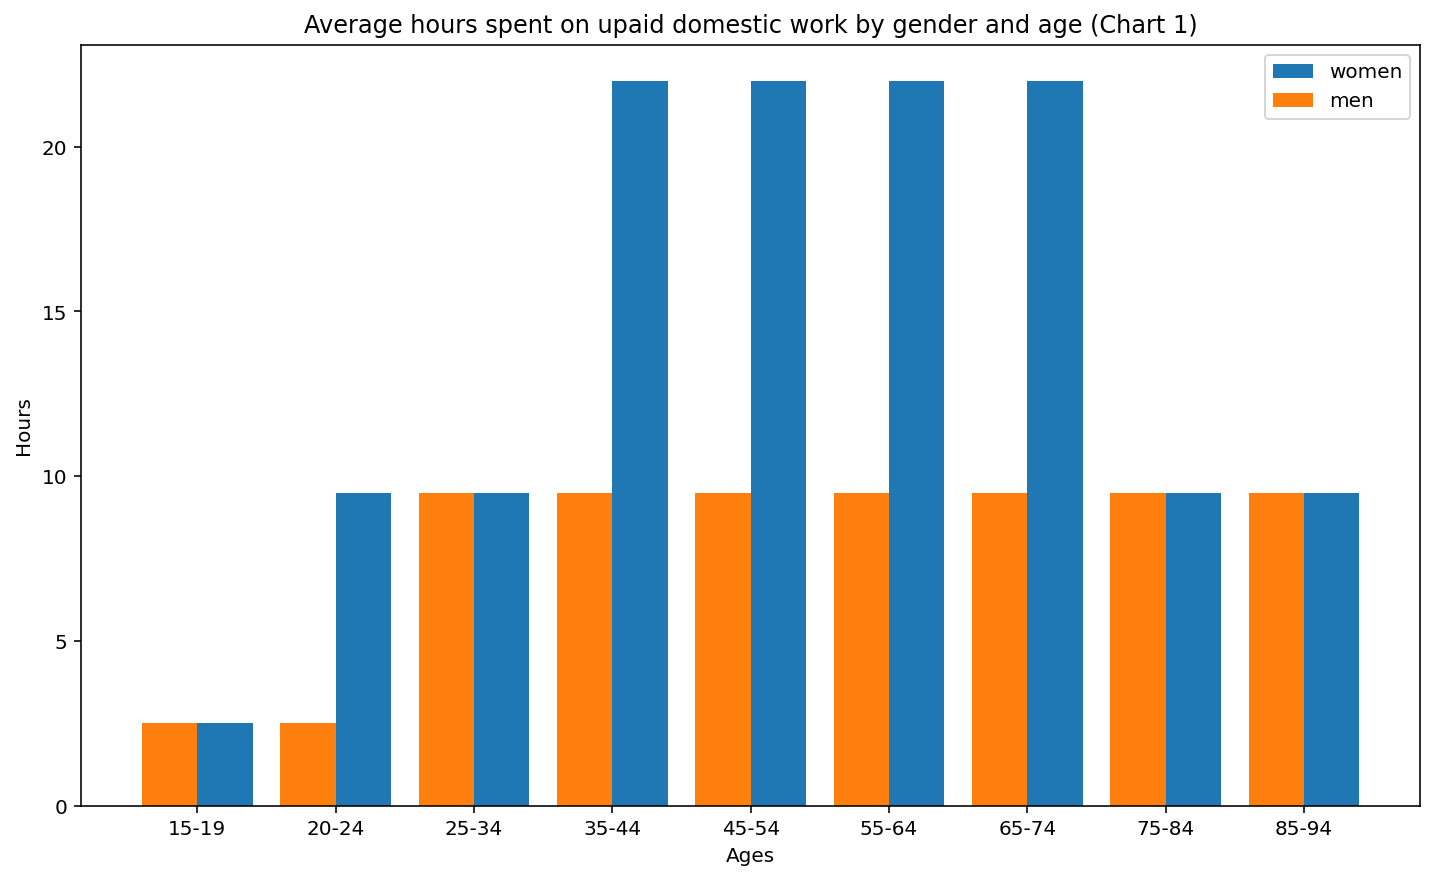

In [19]:
plot_ages_mean(new_mean_women, new_mean_men, women_ages)

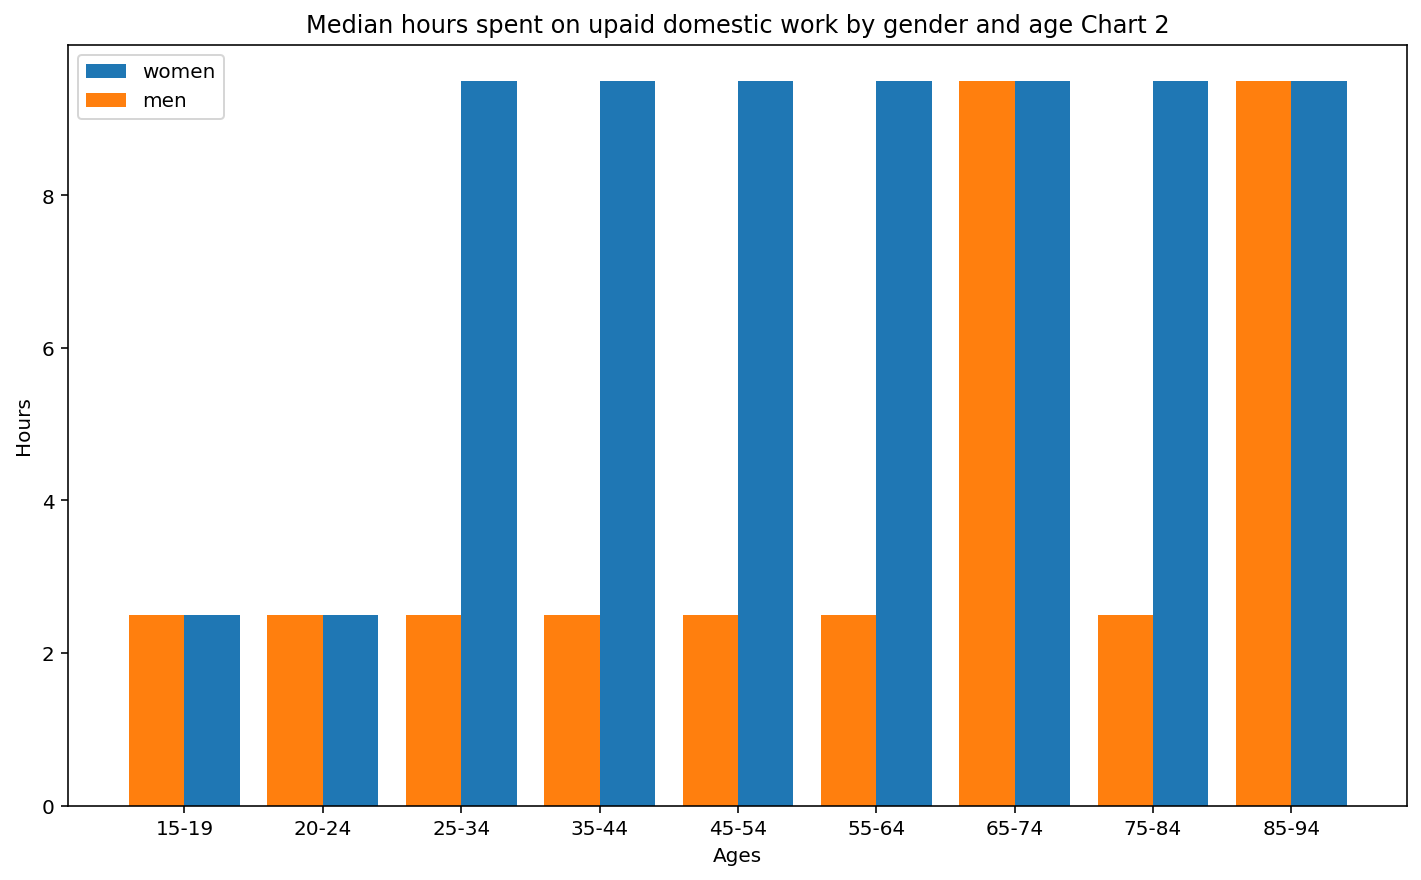

In [20]:
plot_ages_median(new_median_women, new_median_men, women_ages)

In [21]:
#break total data tuple into lists that are easy to plot using matplotlib and cleaner to read
def lists_for_plots_totals(final_totals_gender):
    gender_total_people = []
    gender_total_hours = []
    hours = []
    for i in final_totals_gender:
        gender_total_hours.append(i[0])
        gender_total_people.append(i[1])


    for i in range(len(gender_total_hours)):
        if i == len(gender_total_hours)-1:
            gender_total_hours[i] = gender_total_hours[i] + '+'

        gender_total_hours[i] = gender_total_hours[i].replace('M', '')
        gender_total_hours[i] = gender_total_hours[i].replace('F', '')
        gender_total_hours[i] = gender_total_hours[i].replace("_", "-")
        gender_total_hours[i] = gender_total_hours[i][1:]
        hours.append(gender_total_hours[i])
    return(hours, gender_total_people)
    

In [22]:
hours = lists_for_plots_totals(final_totals_men)[0]
men_total_people = lists_for_plots_totals(final_totals_men)[1]
women_total_people = lists_for_plots_totals(final_totals_women)[1]

In [23]:
#plotting total data using matplotlib
def plot_totals(men_total, women_total, hours):
    xpos = np.arange(len(hours))
    plt.xticks(xpos, hours)
    plt.ylabel("People")
    plt.xlabel("Hours")
    plt.title("Hours spent on unpaid domestic work by gender (Chart 3)")
    plt.bar(xpos+0.2, men_total, width = 0.4, label = 'men')
    plt.bar(xpos-0.2, women_total, width = 0.4, label = 'women')
    plt.legend()
    plt.show()

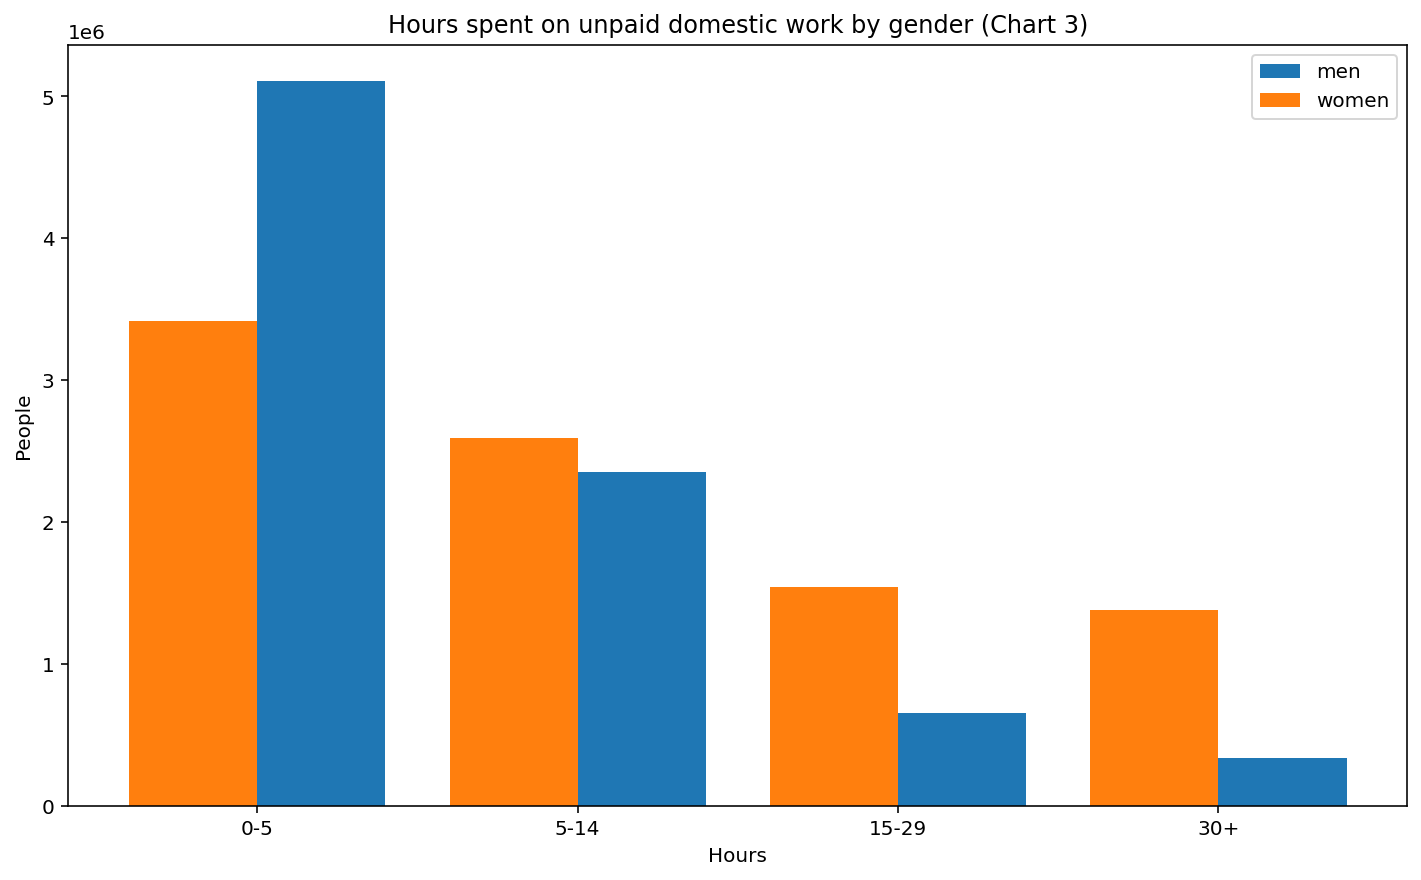

In [24]:
plot_totals(men_total_people, women_total_people, hours)

# Findings

## AGE

I have used two charts for my analysis, one based on mean hours (Chart 1) and the other on median hours (Chart 2). It is important to note that I calculated my means under the assumptions outlined above. Therefore, although I will compare both charts, Chart 2 may be a better reflection of the data. 

The two charts, "Average hours spent on upaid domestic work by gender and age" (Chart 1) and "Median hours spent on upaid domestic work by gender and age" (Chart 2) both show that for every age range, women do either equal or more domestic work than men. This difference is especially prevalent in the middle aged years, between 35-74 in Chart 1 and 25-64 in Chart 2, where the average and median hours for men is between 5-14 hours of domestic work, whilst it is 15-29 hours for women. Interestingly, both charts show that younger women do a relatively similar amount of domestic work to men. In Chart 1 this is for the ages 15-19 and 25-34. In Chart 2 this is between the ages of 15-24. This may imply that there is a generational shift, where the traditional gender roles are changing for young women who may be entering the workforce at a greater rate with the lessening expectation to be "housewives". Opposingly, this could mean that young men are increasing their amount of domestic work, as their expectations change. Additionally, both charts show that as age increases, domestic work becomes equal once again between the genders. Chart 1 appears to show that men do not increase their hours of domestic work in old age, rather women decrease. However, Chart 2 shows that men do in fact increase their hours of domestic work. This may be a function of old age and retirement. Additional analysis is required to verify these findings and their reasons.


## TOTAL

The chart "Total hours spent on unpaid domestic work by gender" shows there are more women doing domestic work at every hourly range besides 0-5 hrs, where there are far more men. Additionally, the difference between the number of men and women increases as the number of hours increase, with the number of women doing 30+ hours of domestic work more than doubling the men. Additionally, as the number of hours increase, the number of men decrease dramatically. Opposingly, the number of women fall at a much more steady rate. This chart clearly shows that women do more domestic work than men. 


# Conclusion

In conclusion, it is clear that my initial hypothesis was correct. Women do more domestic work than men. This was clear in both the total data and age data. However, the age data showed that there may be a generational shift, with younger women doing relatively less domestic work than older women, especially when compared to the equivalently aged men. This may show that there is an advancement in traditional gender roles, however additional analysis would need to be performed to prove this. 
